Link to Data: https://www.kaggle.com/datasets/saurav9786/heart-rate-prediction

In [55]:
# Necessary Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

## Visualization Functions

In [59]:
# Corelation Visualization Function 
def plot_corr_heatmap(df):
    plt.figure(figsize=(16, 13))
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True)
    plt.show()

# Distribution Visuaalization Function
def plot_distribution(df, col_name):
    if col_name not in df.columns: 
        return print(f"'{col_name}' is not a column in the dataframe.")
    if not pd.api.types.is_numeric_dtype(df[col_name]):
        return print(f"'{col_name}' is not a numerical column.")
    plt.figure(figsize=(10,8))
    sns.histplot(data=df, x=col_name, kde=True)
    plt.title(f'Distribution of {col_name}')
    plt.xlabel(col_name)
    plt.ylabel('Count')
    # Get percentile values
    p5 = np.percentile(df[col_name], 5)
    p25 = np.percentile(df[col_name], 25)
    p50 = np.percentile(df[col_name], 50)
    p75 = np.percentile(df[col_name], 75)
    p95 = np.percentile(df[col_name], 95)
    # Plot vertical lines for percentiles
    plt.axvline(p5, color='r', linestyle='--', label='5th percentile')
    plt.axvline(p25, color='g', linestyle='--', label='25th percentile')
    plt.axvline(p50, color='b', linestyle='--', label='50th percentile (median)')
    plt.axvline(p75, color='g', linestyle='--', label='75th percentile')
    plt.axvline(p95, color='r', linestyle='--', label='95th percentile')
    plt.legend()
    return plt.show()

## time domain features - train

In [3]:
tdf_train = pd.read_csv("C:\\Users\\Peter\\Data\\HeartRate\\train\\time_domain_features_train.csv")
tdf_train.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,uuid
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218,89df2855-56eb-4706-a23b-b39363dd605a
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286,80c795e4-aa56-4cc0-939c-19634b89cbb2
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813,c2d5d102-967c-487d-88f2-8b005a449f3e
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138,37eabc44-1349-4040-8896-0d113ad4811f
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7


In [4]:
tdf_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369289 entries, 0 to 369288
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MEAN_RR            369289 non-null  float64
 1   MEDIAN_RR          369289 non-null  float64
 2   SDRR               369289 non-null  float64
 3   RMSSD              369289 non-null  float64
 4   SDSD               369289 non-null  float64
 5   SDRR_RMSSD         369289 non-null  float64
 6   HR                 369289 non-null  float64
 7   pNN25              369289 non-null  float64
 8   pNN50              369289 non-null  float64
 9   KURT               369289 non-null  float64
 10  SKEW               369289 non-null  float64
 11  MEAN_REL_RR        369289 non-null  float64
 12  MEDIAN_REL_RR      369289 non-null  float64
 13  SDRR_REL_RR        369289 non-null  float64
 14  RMSSD_REL_RR       369289 non-null  float64
 15  SDSD_REL_RR        369289 non-null  float64
 16  SD

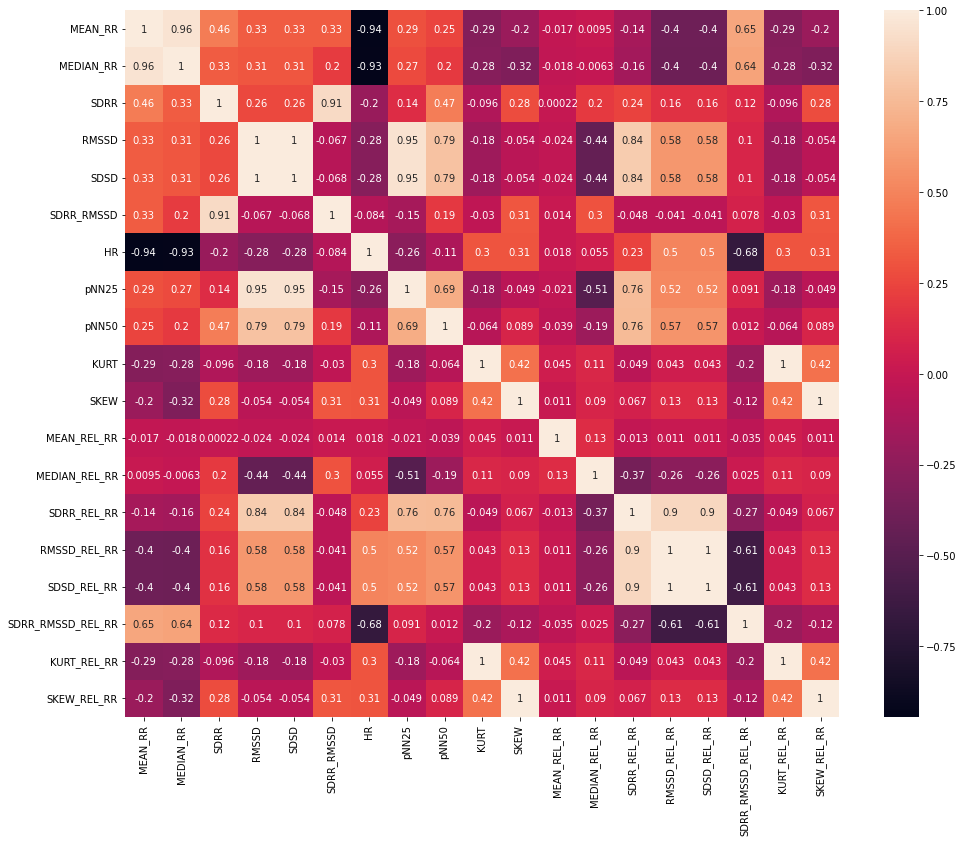

In [60]:
plot_corr_heatmap(tdf_train)

## # frequency domain features - train

In [6]:
fdf_train = pd.read_csv("C:\\Users\\Peter\\Data\\HeartRate\\train\\frequency_domain_features_train.csv")
fdf_train.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF
0,89df2855-56eb-4706-a23b-b39363dd605a,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055
2,c2d5d102-967c-487d-88f2-8b005a449f3e,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607
3,37eabc44-1349-4040-8896-0d113ad4811f,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912


In [7]:
fdf_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369289 entries, 0 to 369288
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   uuid     369289 non-null  object 
 1   VLF      369289 non-null  float64
 2   VLF_PCT  369289 non-null  float64
 3   LF       369289 non-null  float64
 4   LF_PCT   369289 non-null  float64
 5   LF_NU    369289 non-null  float64
 6   HF       369289 non-null  float64
 7   HF_PCT   369289 non-null  float64
 8   HF_NU    369289 non-null  float64
 9   TP       369289 non-null  float64
 10  LF_HF    369289 non-null  float64
 11  HF_LF    369289 non-null  float64
dtypes: float64(11), object(1)
memory usage: 33.8+ MB


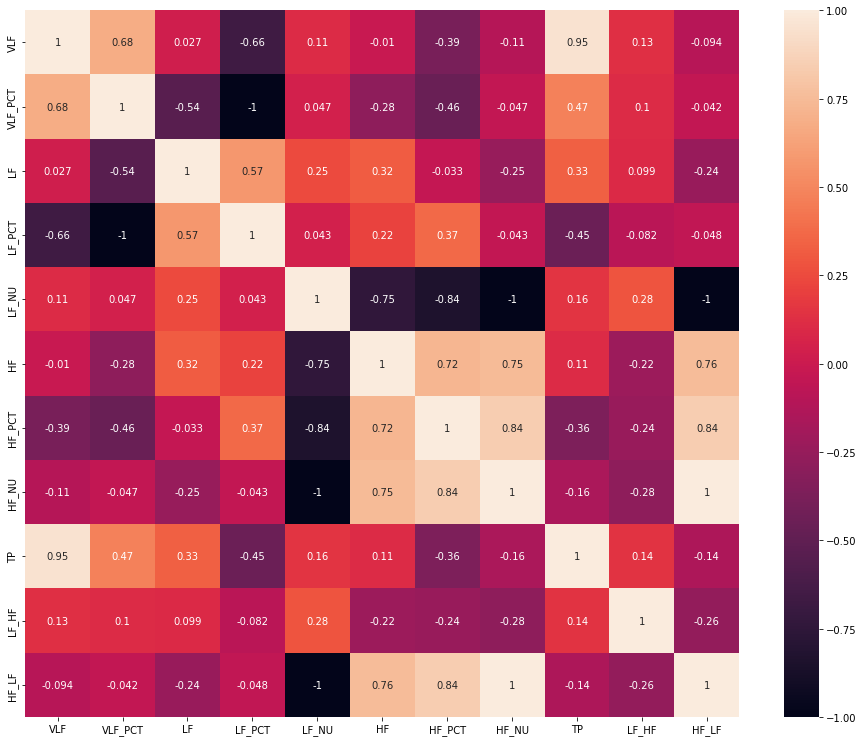

In [61]:
plot_corr_heatmap(fdf_train)

## heart rate non linear features - train

In [9]:
hrnlf_train = pd.read_csv("C:\\Users\\Peter\\Data\\HeartRate\\train\\heart_rate_non_linear_features_train.csv")
hrnlf_train.head()

,uuid,SD1,SD2,sampen,higuci,datasetId,condition
0,89df2855-56eb-4706-a23b-b39363dd605a,11.001565,199.061782,2.139754,1.163485,2,no stress
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,9.170129,114.634458,2.174499,1.084711,2,interruption
2,c2d5d102-967c-487d-88f2-8b005a449f3e,11.533417,118.939253,2.135350,1.176315,2,interruption
3,37eabc44-1349-4040-8896-0d113ad4811f,11.119476,127.318597,2.178341,1.179688,2,no stress
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,13.590641,87.718281,2.221121,1.249612,2,no stress


In [10]:
hrnlf_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369289 entries, 0 to 369288
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   uuid       369289 non-null  object 
 1   SD1        369289 non-null  float64
 2   SD2        369289 non-null  float64
 3   sampen     369289 non-null  float64
 4   higuci     369289 non-null  float64
 5   datasetId  369289 non-null  int64  
 6   condition  369289 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 19.7+ MB


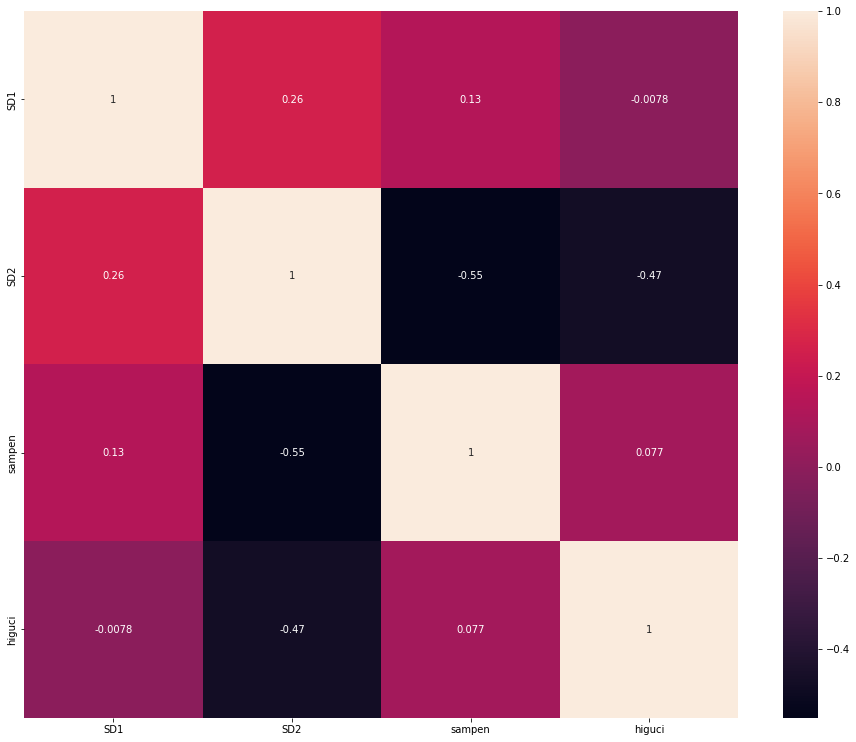

In [62]:
plot_corr_heatmap(hrnlf_train.drop(columns={"datasetId"}))

## Combine all training data into a single train df on uuid

In [12]:
df = pd.merge(pd.merge(tdf_train, fdf_train, on='uuid'), hrnlf_train, on='uuid')
df.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,...,HF_NU,TP,LF_HF,HF_LF,SD1,SD2,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,-0.856554,...,1.514737,3686.666157,65.018055,0.015380,11.001565,199.061782,2.139754,1.163485,2,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,-0.408190,...,0.304603,3006.487251,327.296635,0.003055,9.170129,114.634458,2.174499,1.084711,2,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,0.351789,...,1.049528,2685.879461,94.280910,0.010607,11.533417,118.939253,2.135350,1.176315,2,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,-0.504947,...,1.775294,3434.520980,55.328701,0.018074,11.119476,127.318597,2.178341,1.179688,2,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,-0.548408,...,3.279993,2621.175204,29.487873,0.033912,13.590641,87.718281,2.221121,1.249612,2,no stress


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369289 entries, 0 to 369288
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MEAN_RR            369289 non-null  float64
 1   MEDIAN_RR          369289 non-null  float64
 2   SDRR               369289 non-null  float64
 3   RMSSD              369289 non-null  float64
 4   SDSD               369289 non-null  float64
 5   SDRR_RMSSD         369289 non-null  float64
 6   HR                 369289 non-null  float64
 7   pNN25              369289 non-null  float64
 8   pNN50              369289 non-null  float64
 9   KURT               369289 non-null  float64
 10  SKEW               369289 non-null  float64
 11  MEAN_REL_RR        369289 non-null  float64
 12  MEDIAN_REL_RR      369289 non-null  float64
 13  SDRR_REL_RR        369289 non-null  float64
 14  RMSSD_REL_RR       369289 non-null  float64
 15  SDSD_REL_RR        369289 non-null  float64
 16  SD

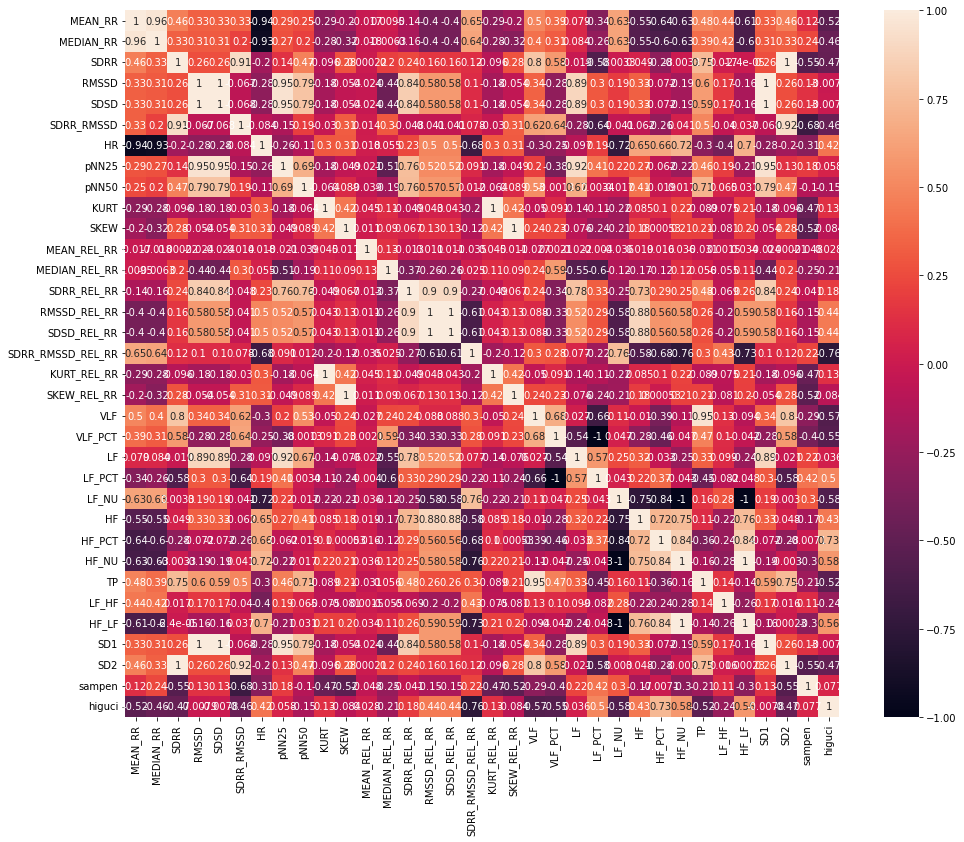

In [63]:
plot_corr_heatmap(df.drop(columns={"datasetId"}))

## Distribution Visualizations for All Training Features + Target (HR)

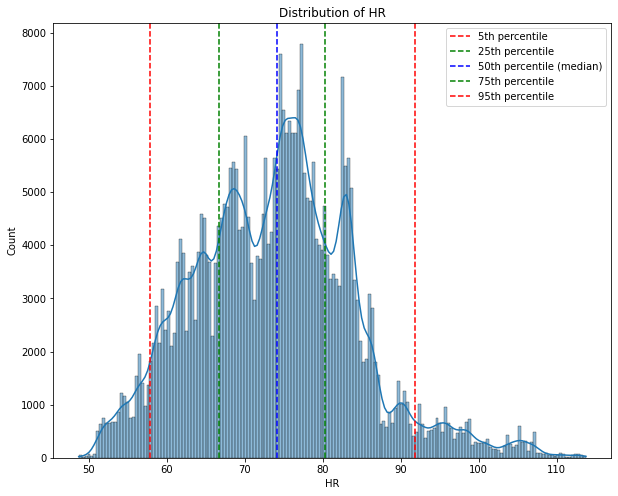

In [14]:
plot_distribution(df, 'HR')

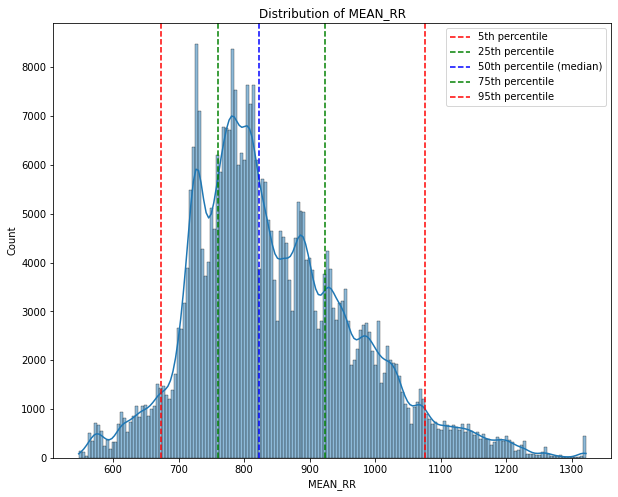

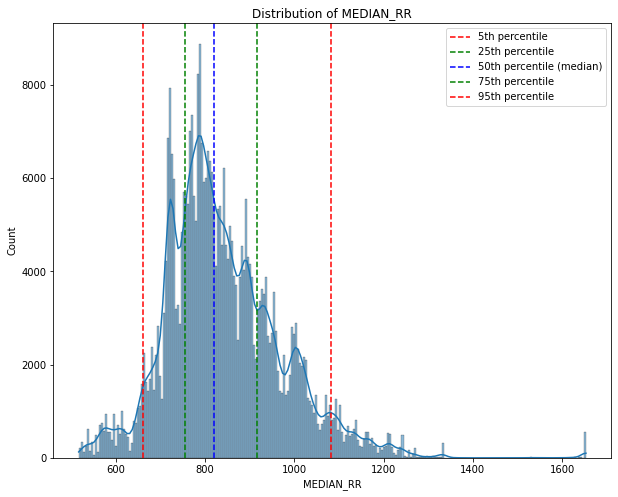

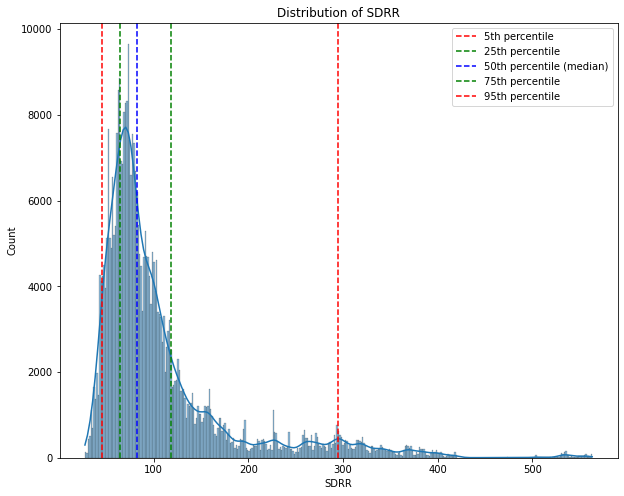

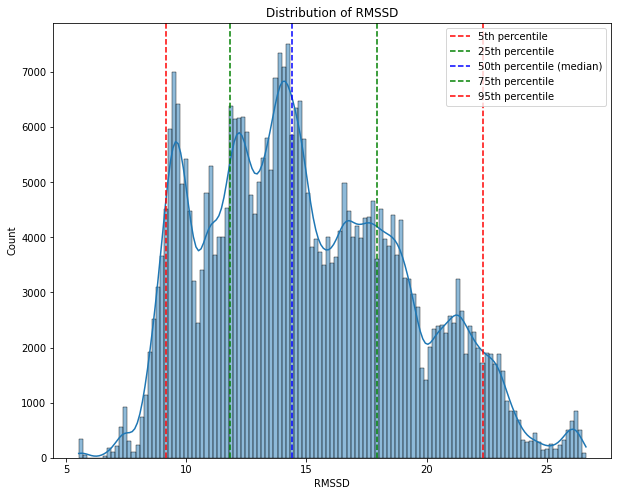

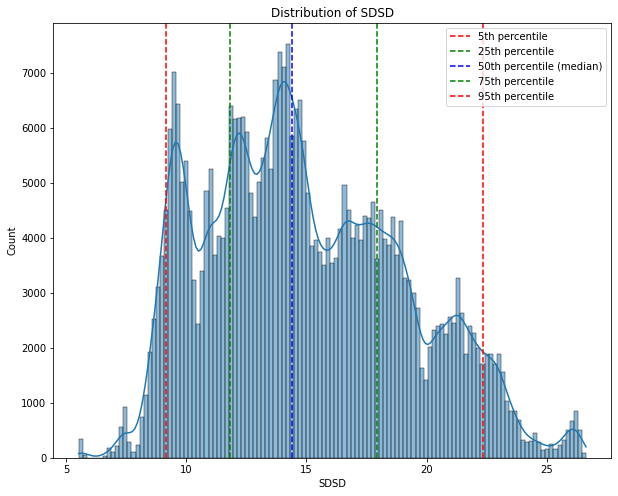

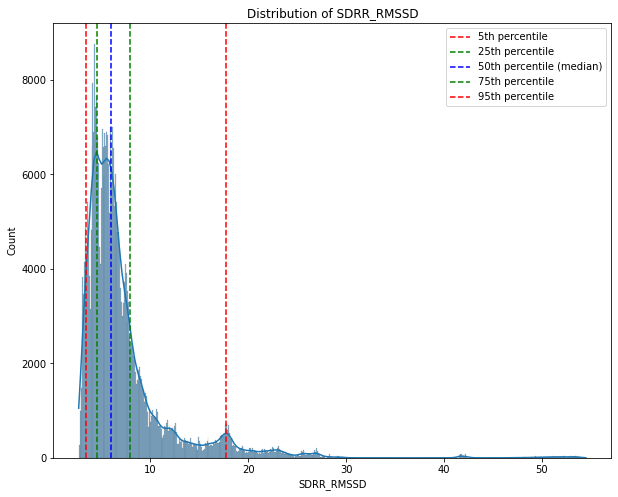

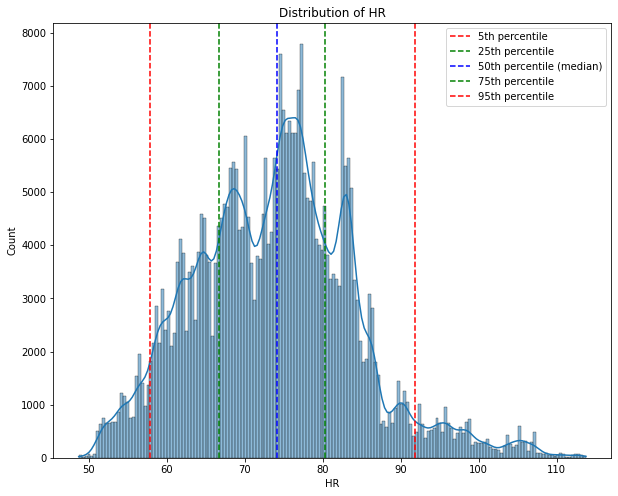

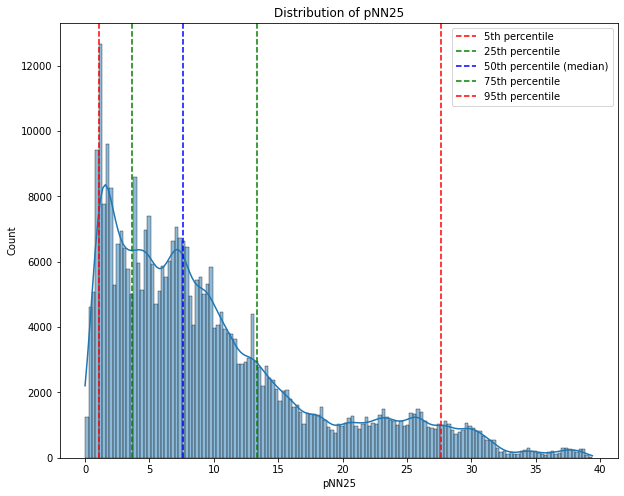

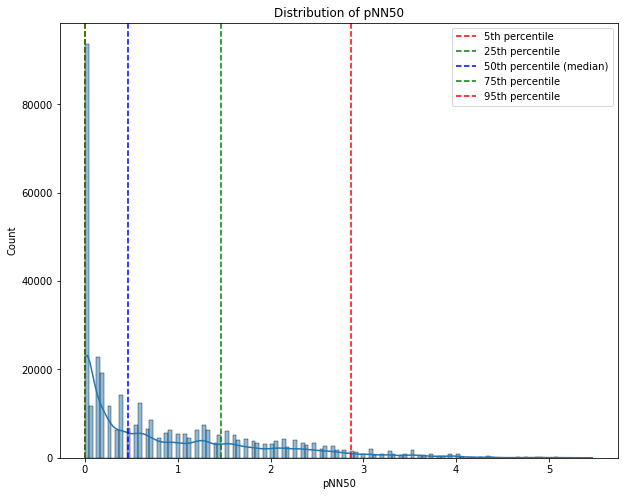

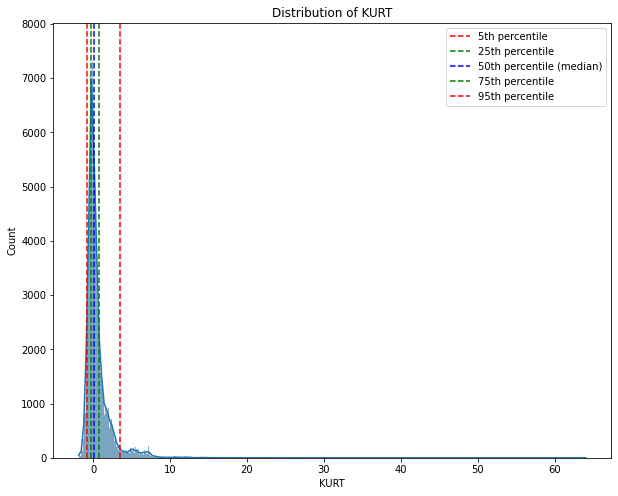

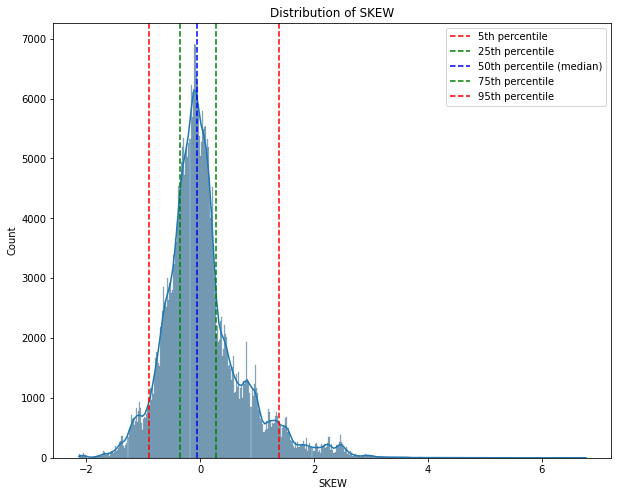

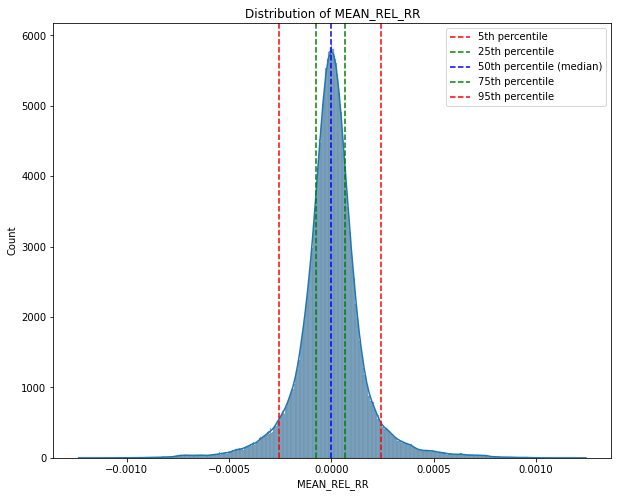

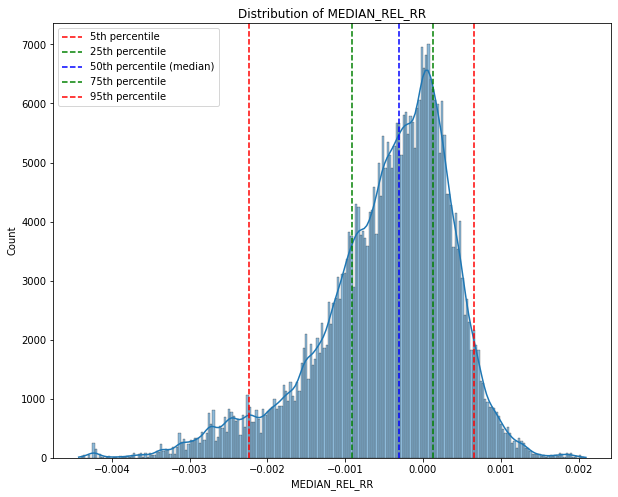

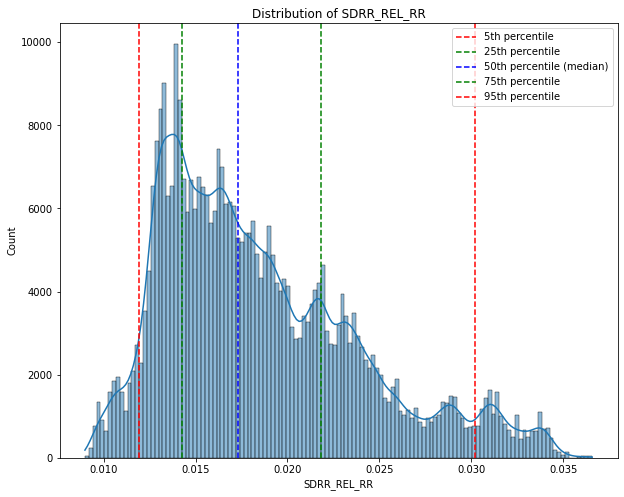

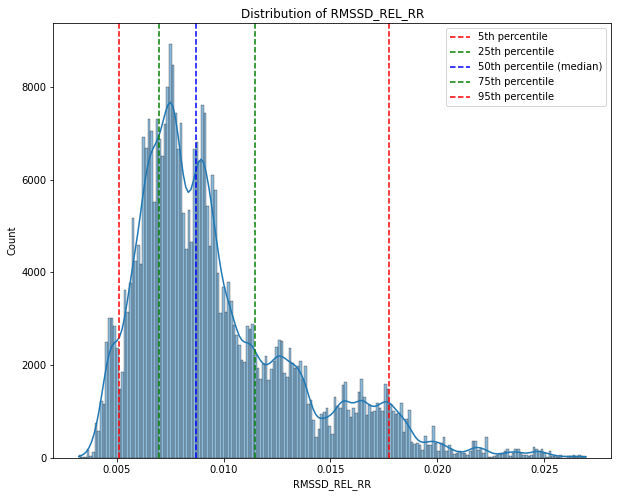

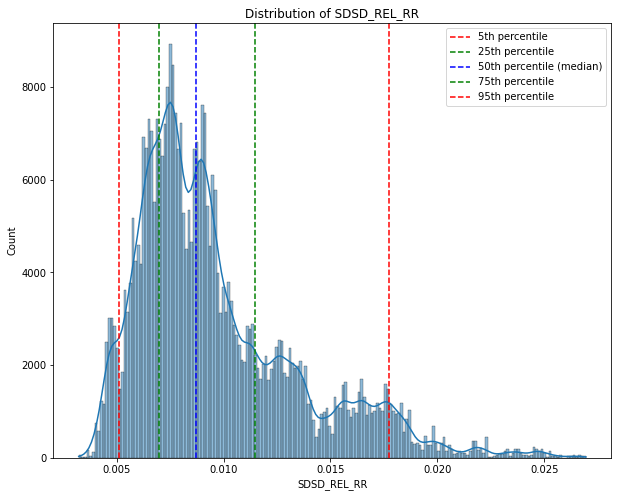

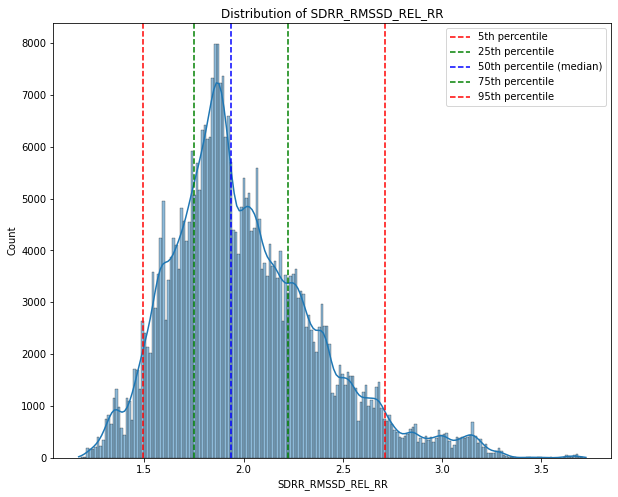

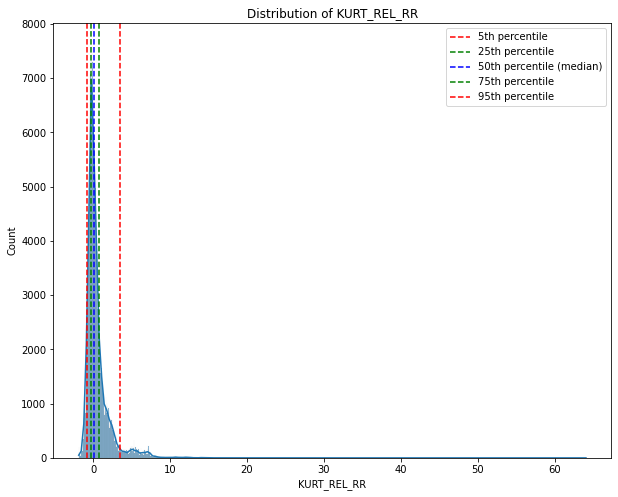

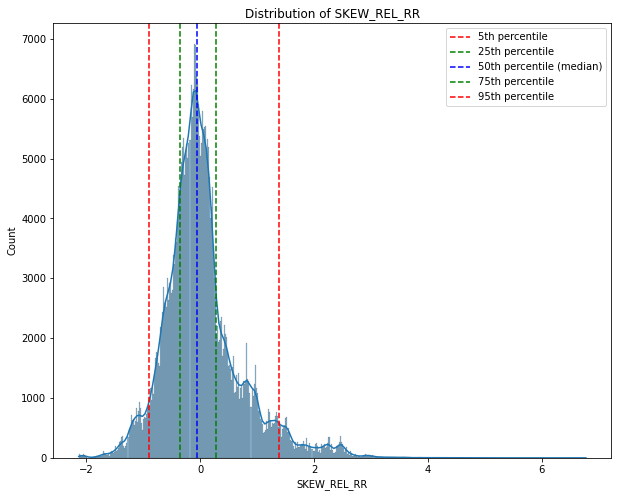

'uuid' is not a numerical column.


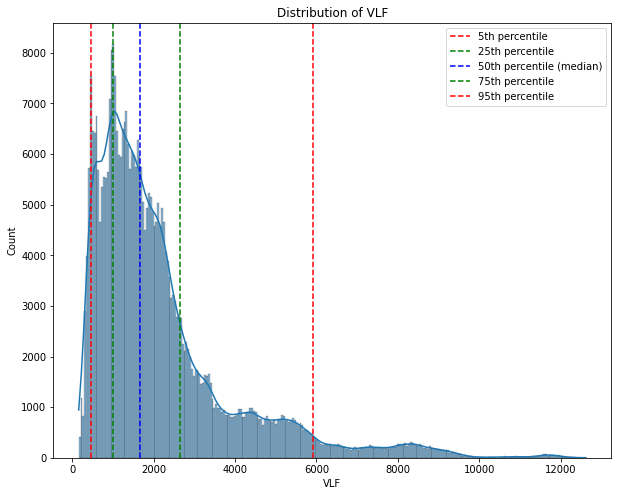

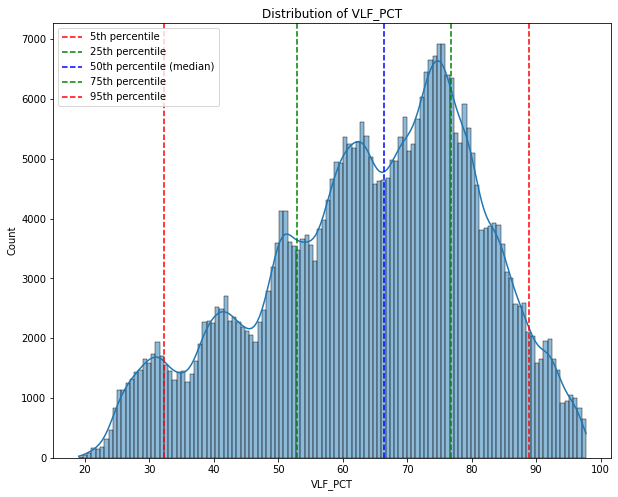

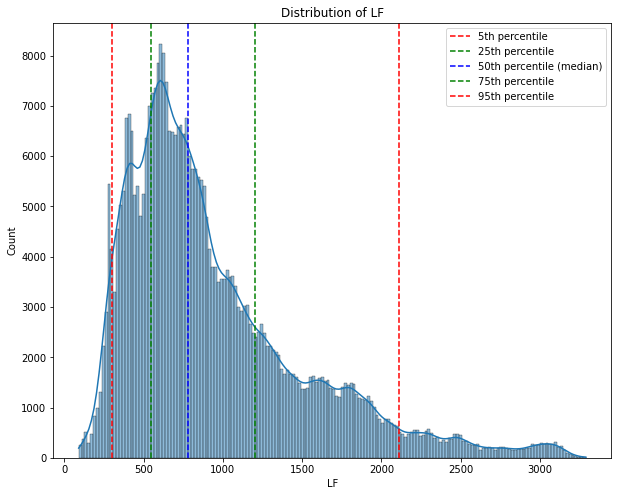

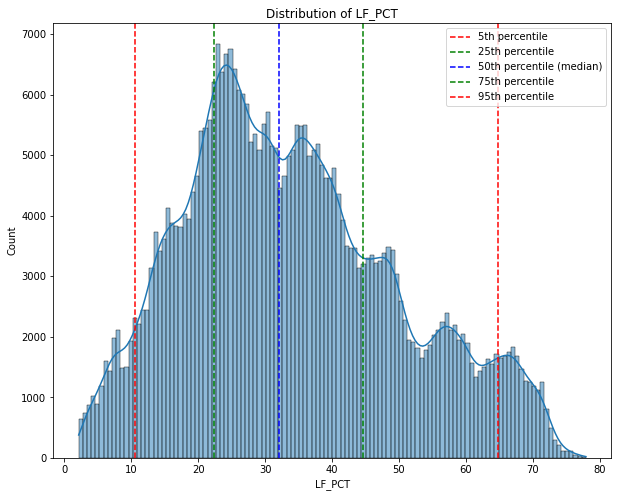

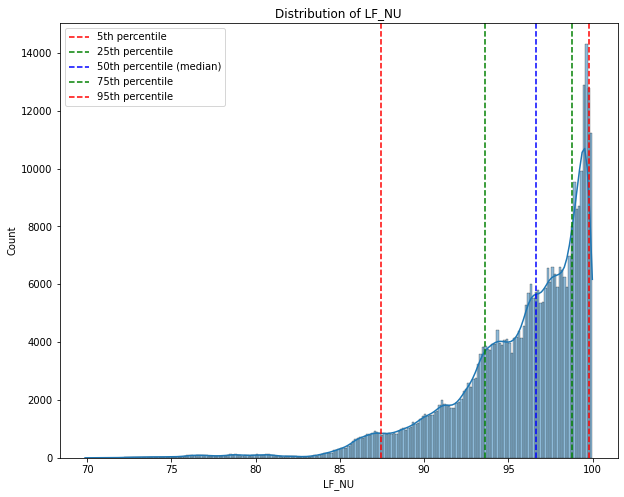

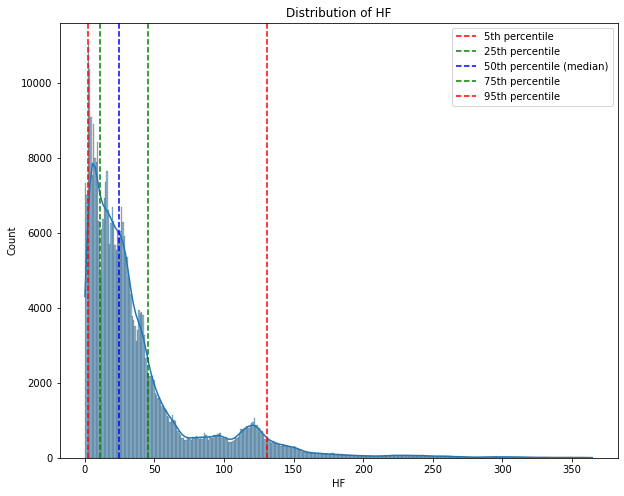

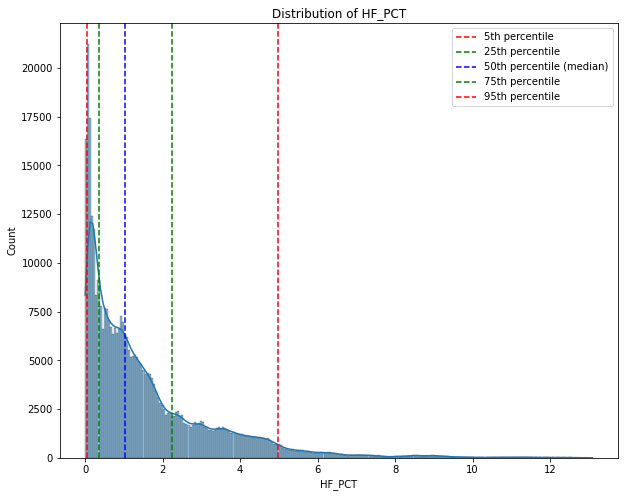

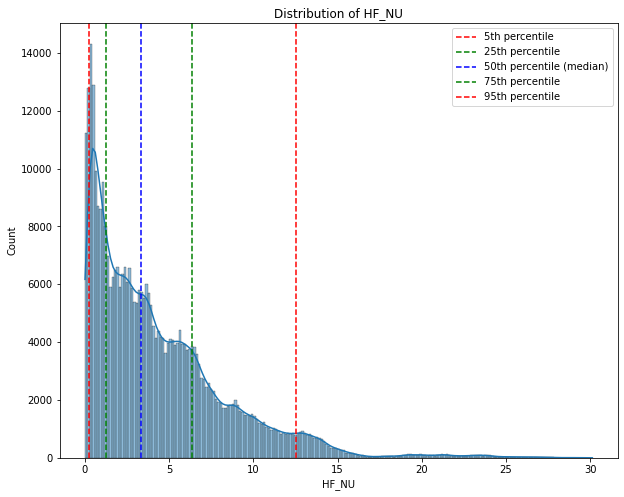

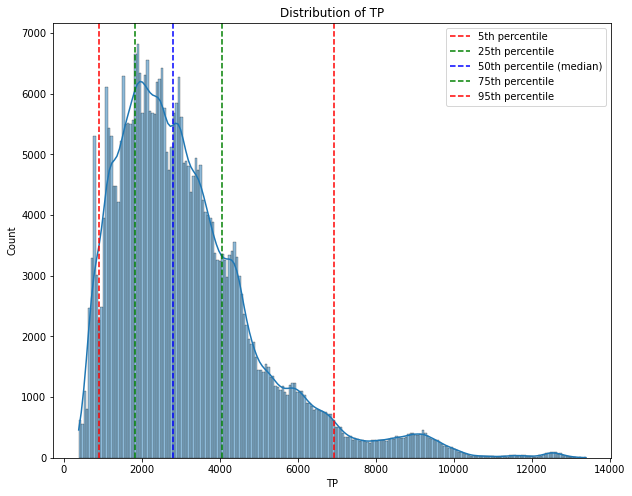

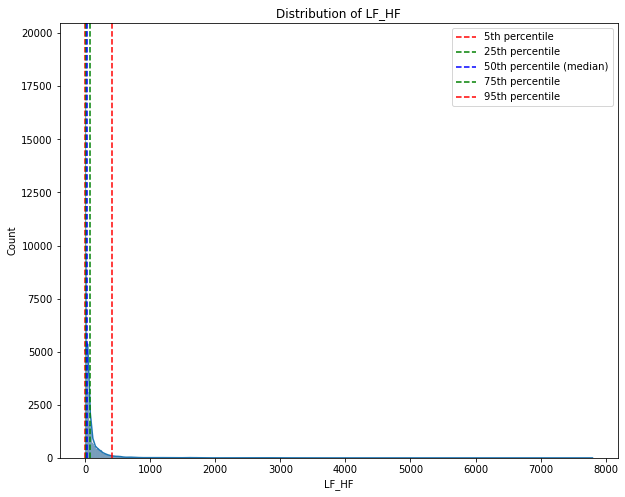

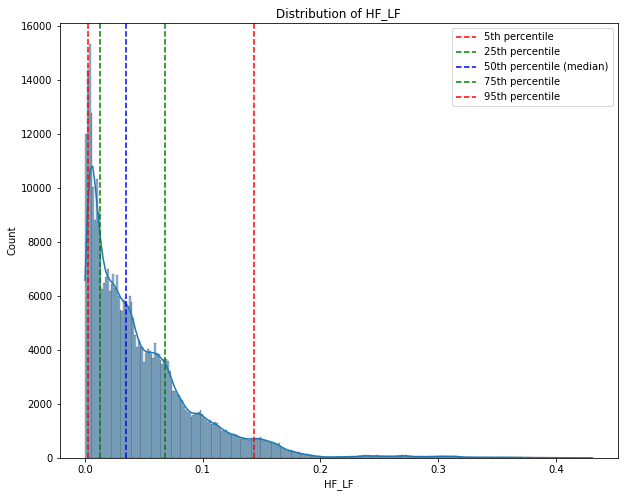

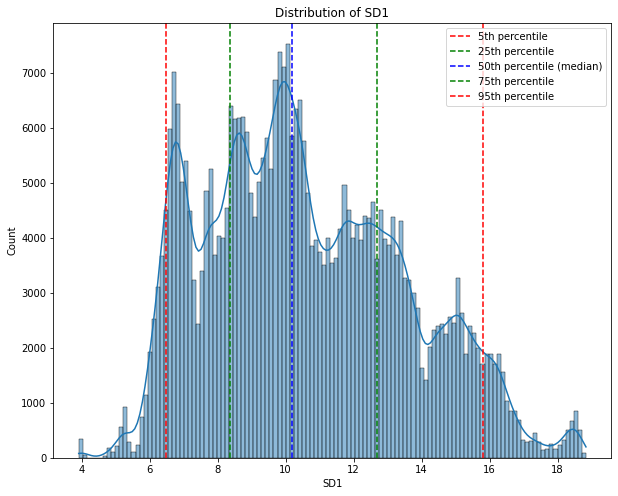

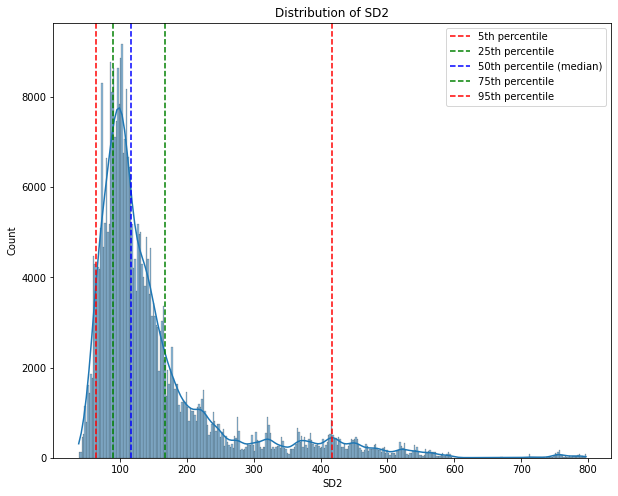

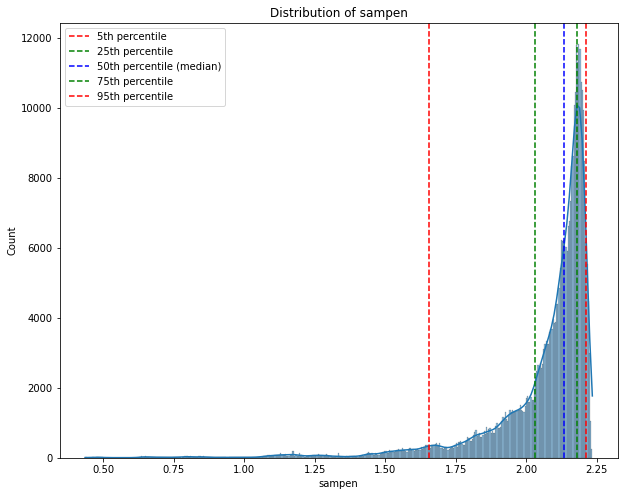

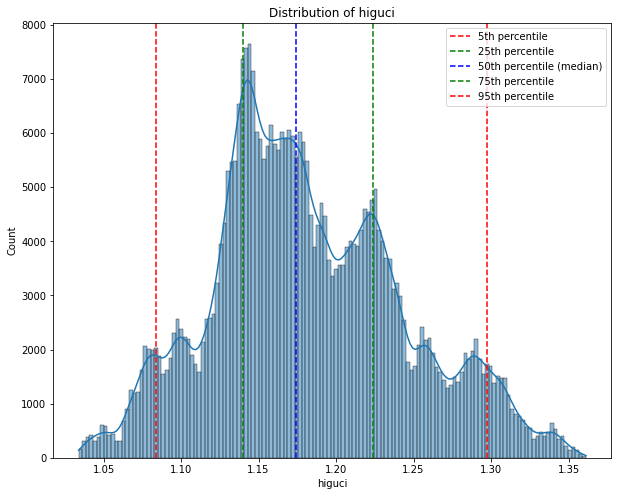

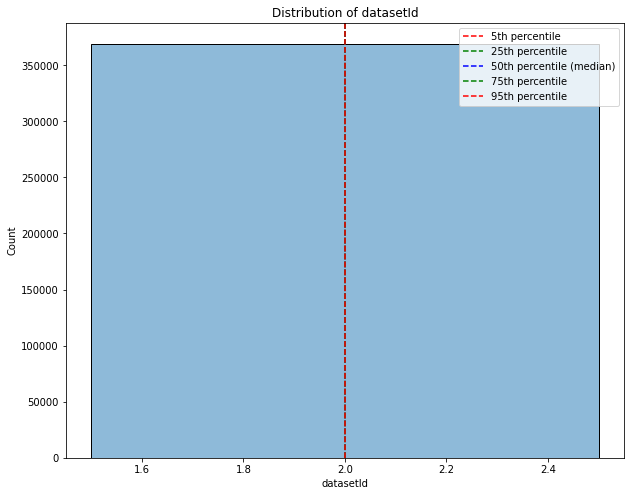

'condition' is not a numerical column.


In [15]:
for i in df: plot_distribution(df, i)

# Machine Learning Models

## Model Variables

In [40]:
# Split the data into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Define the list of features and target variable
target = 'HR'
features = list(train_df.drop(columns={"HR","uuid","condition"}).columns)

# Convert the data to numpy arrays
X_train = np.array(train_df[features])
y_train = np.array(train_df[target])
X_test = np.array(test_df[features])
y_test = np.array(test_df[target])

## ML Model 1 - Sci Kit Learn Linear Regression

In [41]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set and calculate the mean squared error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.067878900945204


## ML Model 2 - Tensor Flow neural network model for regression 

This is a fully connected neural network model. It has three hidden layers with 128, 64, and 32 units respectively, and an output layer with a single unit. The activation function used in the hidden layers is ReLU, and the output layer has a linear activation function. The model also includes dropout layers with a dropout rate of 0.5 to prevent overfitting, and L2 regularization with a regularization factor of 0.001 to prevent the model from becoming too complex. The model is compiled with the Adam optimizer, mean squared error loss function, and mean absolute error metric.

To improve the performance of the model, the input data is normalized using the StandardScaler from the scikit-learn library. After training the model, the performance is evaluated on the test set, and the test loss and mean absolute error are printed.

To further visualize and test the model, the training and validation loss and mean absolute error are plotted over epochs using the history object returned by the fit method. Additionally, a scatter plot of actual versus predicted values of the target variable on the test set is created using the seaborn library.

In [ ]:
# Normalize the input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)

# Print the test loss and mean absolute error
print('Test loss:', test_loss)
print('Test MAE:', test_mae)

Epoch 1/100
7386/7386 [==============================] - 6s 800us/step - loss: 141.5180 - mean_absolute_error: 8.0682 - val_loss: 2.0166 - val_mean_absolute_error: 0.8724
Epoch 2/100
7386/7386 [==============================] - 6s 789us/step - loss: 6.5211 - mean_absolute_error: 1.7664 - val_loss: 1.7469 - val_mean_absolute_error: 0.7612
Epoch 3/100
7386/7386 [==============================] - 6s 784us/step - loss: 2.9974 - mean_absolute_error: 1.1742 - val_loss: 1.4989 - val_mean_absolute_error: 0.6566
Epoch 4/100
7386/7386 [==============================] - 6s 785us/step - loss: 2.5138 - mean_absolute_error: 1.0729 - val_loss: 2.1481 - val_mean_absolute_error: 0.8662
Epoch 5/100
7386/7386 [==============================] - 6s 785us/step - loss: 2.2526 - mean_absolute_error: 1.0203 - val_loss: 1.4518 - val_mean_absolute_error: 0.7129
Epoch 6/100
7386/7386 [==============================] - 6s 789us/step - loss: 2.1055 - mean_absolute_error: 0.9861 - val_loss: 1.2883 - val_mean_absolut

In [ ]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Get the predicted values for the test set
y_pred = model.predict(X_test_scaled)

# Create a scatter plot of actual versus predicted values
sns.scatterplot(x=y_test, y=y_pred.reshape(-1))
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## ML Model 3 - Implemented automated hyperparameter tuning

In [56]:
# Define a function to create the model with the given hyperparameters
def create_model(activation='relu', dropout_rate=0.0, weight_decay=0.0):
    model = keras.Sequential([
        keras.layers.Dense(128, activation=activation, input_shape=(X_train.shape[1],)),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(64, activation=activation, kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(32, activation=activation, kernel_regularizer=tf.keras.regularizers.l2(weight_decay)),
        keras.layers.Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model

# Create the scaler object and scale the input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the KerasRegressor object for use in scikit-learn
model = KerasRegressor(build_fn=create_model, verbose=0)

# Define the hyperparameters to search over
param_grid = {
    'activation': ['relu', 'tanh'],
    'dropout_rate': [0.2, 0.4, 0.6],
    'weight_decay': [0.0, 0.001, 0.01]
}

# Perform the grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train_scaled, y_train)

# Print the best hyperparameters and corresponding mean test score
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Evaluate the best model on the test set
best_model = grid_result.best_estimator_.model
test_loss, test_mae = best_model.evaluate(X_test_scaled, y_test)
print('Test loss:', test_loss)
print('Test MAE:', test_mae)

C:\Users\Peter\AppData\Local\Temp\ipykernel_11044\3601910094.py:20: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


Best: -4.190948 using {'activation': 'relu', 'dropout_rate': 0.4, 'weight_decay': 0.0}
2309/2309 [==============================] - 1s 419us/step - loss: 13.6414 - mean_absolute_error: 3.0922
Test loss: 13.641357421875
Test MAE: 3.09224796295166
